In [1]:
## Send hardest problems through LLMs

import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
from pysat.solvers import Glucose42, Minicard, Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..')
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import brute_force, dpll
ksg = KSAT_Generator()
#ksg.kcnf_to_cnf(hardest_problem[1]]

C:\Users\shairozs\Documents\Projects\ExploringKSAT


In [2]:
ksg = KSAT_Generator()

folder = r'C:/Users/shairozs/Documents/Projects/ExploringKSAT/Data/CBS'
instances = [os.path.join(folder,x) for x in os.listdir(folder) if x.endswith('.cnf')]

In [66]:
idx = 10
statement = ksg.from_dimacs_file(instances[idx], 0)
#statement = ksg.kcnf_to_cnf(ksg.random_kcnf(10, 35))
#ksg.cnf_score(ksg.from_dimacs_file(instances[0], 0))
#ksg.describe_literal(statement, 2)
len(statement)

403

In [73]:
import torch
from torch import nn
from torchvision import datasets, transforms

### MODEL ###
class MLPBlock(nn.Module):
    
    def __init__(self, inplane, outplane, batchnorm=False, activation = nn.ReLU()):
        super(MLPBlock, self).__init__()
        self.linear = nn.Linear(inplane, outplane)
        self.batchnorm = batchnorm
        self.bn = nn.BatchNorm1d(outplane)
        self.act = activation#nn.GELU()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.act(x)
        x = self.bn(x) if self.batchnorm else x
        return x
        
class MLP(nn.Module):
    
    def __init__(self, batchnorm = 1, layer_sizes = [784, 256, 128, 128], output_size = 10, activation = nn.ReLU(), dropout = 0.2, init = torch.nn.init.kaiming_uniform_):
        super(MLP, self).__init__()
        
        self.batchnorm = batchnorm 
        self.units = layer_sizes
        self.output_layer  = nn.Linear(self.units[-1], output_size)        


        self.module_list = nn.ModuleList( [MLPBlock(self.units[i], self.units[i+1], batchnorm=self.batchnorm, activation = activation) for i in range(len(self.units)-1)])
        [self.weights_init(m.linear, init) for m in self.module_list]
        
        self.f3 = nn.Dropout(p=dropout)
        self.act2 = activation#nn.ReLU()
       

    
    def forward(self, data):
        x = data
        output = []
        for module in self.module_list:
            x_ = module(x.detach())
            x = module(x)
            output.append(x_)
        x = self.f3(x)
        x_ = self.act2(self.output_layer(x.detach()))
        x = self.act2(self.output_layer(x))
        output.append(x_)
        return x, output


    def weights_init(self, m, fn = torch.nn.init.kaiming_uniform_):
        if isinstance(m, nn.Linear):
            fn(m.weight)

C:\Users\shairozs\.conda\envs\pytorch2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
mpn = MLP(layer_sizes = [403, 403, 500, 100, 100])


In [87]:
import torch
ms1 = torch.Tensor(mat_sat.T); print(ms1.shape)
result = mpn(ms1)[0]; result.shape

torch.Size([100, 403])


torch.Size([100, 10])

In [67]:
solver = Glucose42()
solver.append_formula(statement)
print(solver.solve())
solution = solver.get_model()
solution = np.array(solution)[:, np.newaxis]


True


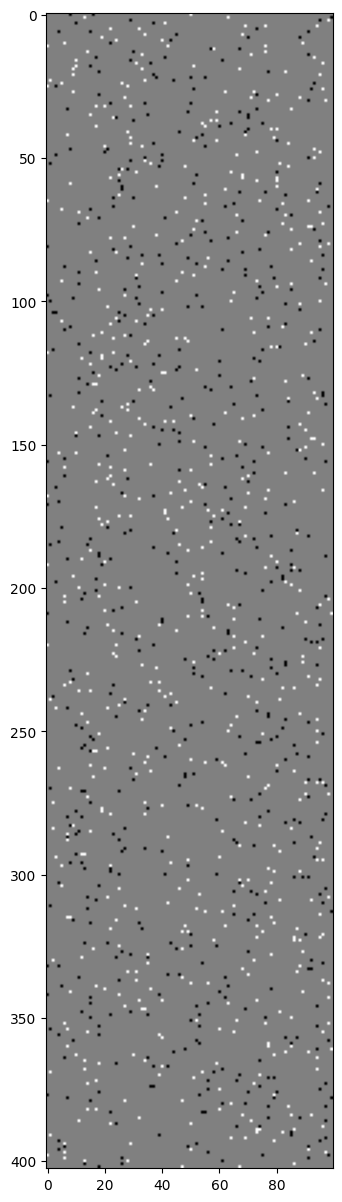

In [68]:
import matplotlib.pyplot as plt

mat_sat = ksg.cnf_to_matrix(statement)
plt.subplots(figsize = (5, 15))
plt.imshow(mat_sat, 'gray')

In [69]:
print(mat_sat.shape, solution.shape)
solution_mat = mat_sat.dot(solution)
solution_mat.shape

(403, 100) (100, 1)


(403, 1)

In [70]:
np.sum(solution_mat)

6558.0

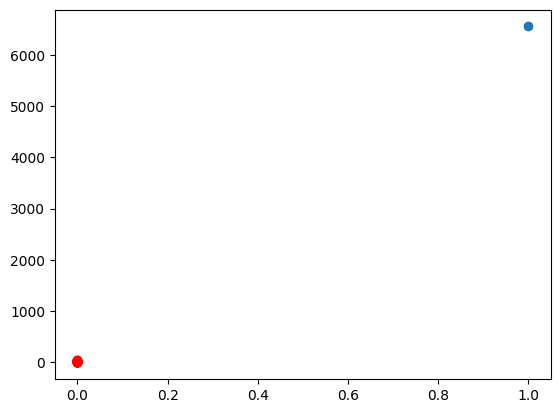

In [71]:
plt.scatter(x = 1, y = np.sum(solution_mat))
vals = []
for _ in range(50):
    fake_sol = np.random.random(solution.shape)
    new_sol = mat_sat.dot(fake_sol)
    v = np.sum(new_sol); vals.append(v)
    plt.scatter(x = 0, y = v, c = 'red')

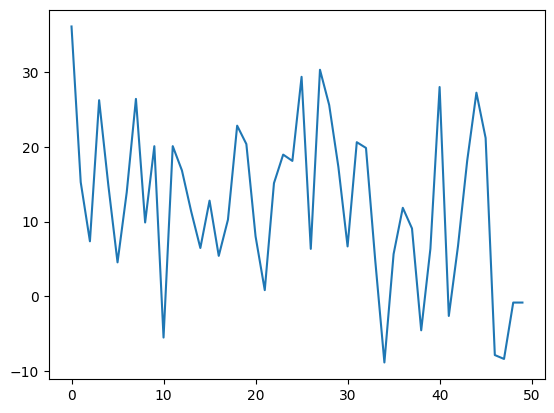

In [72]:
plt.plot(vals)